# Import Image

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 

In [32]:
image = cv2.imread('InputImage.jpg',cv2.IMREAD_UNCHANGED)


# EDA

In [33]:
def plot(data):
    img=np.asarray(data)
    plt.figure(figsize=(30,30))
    plt.imshow(img,cmap='gray', vmin=0, vmax=255)
    

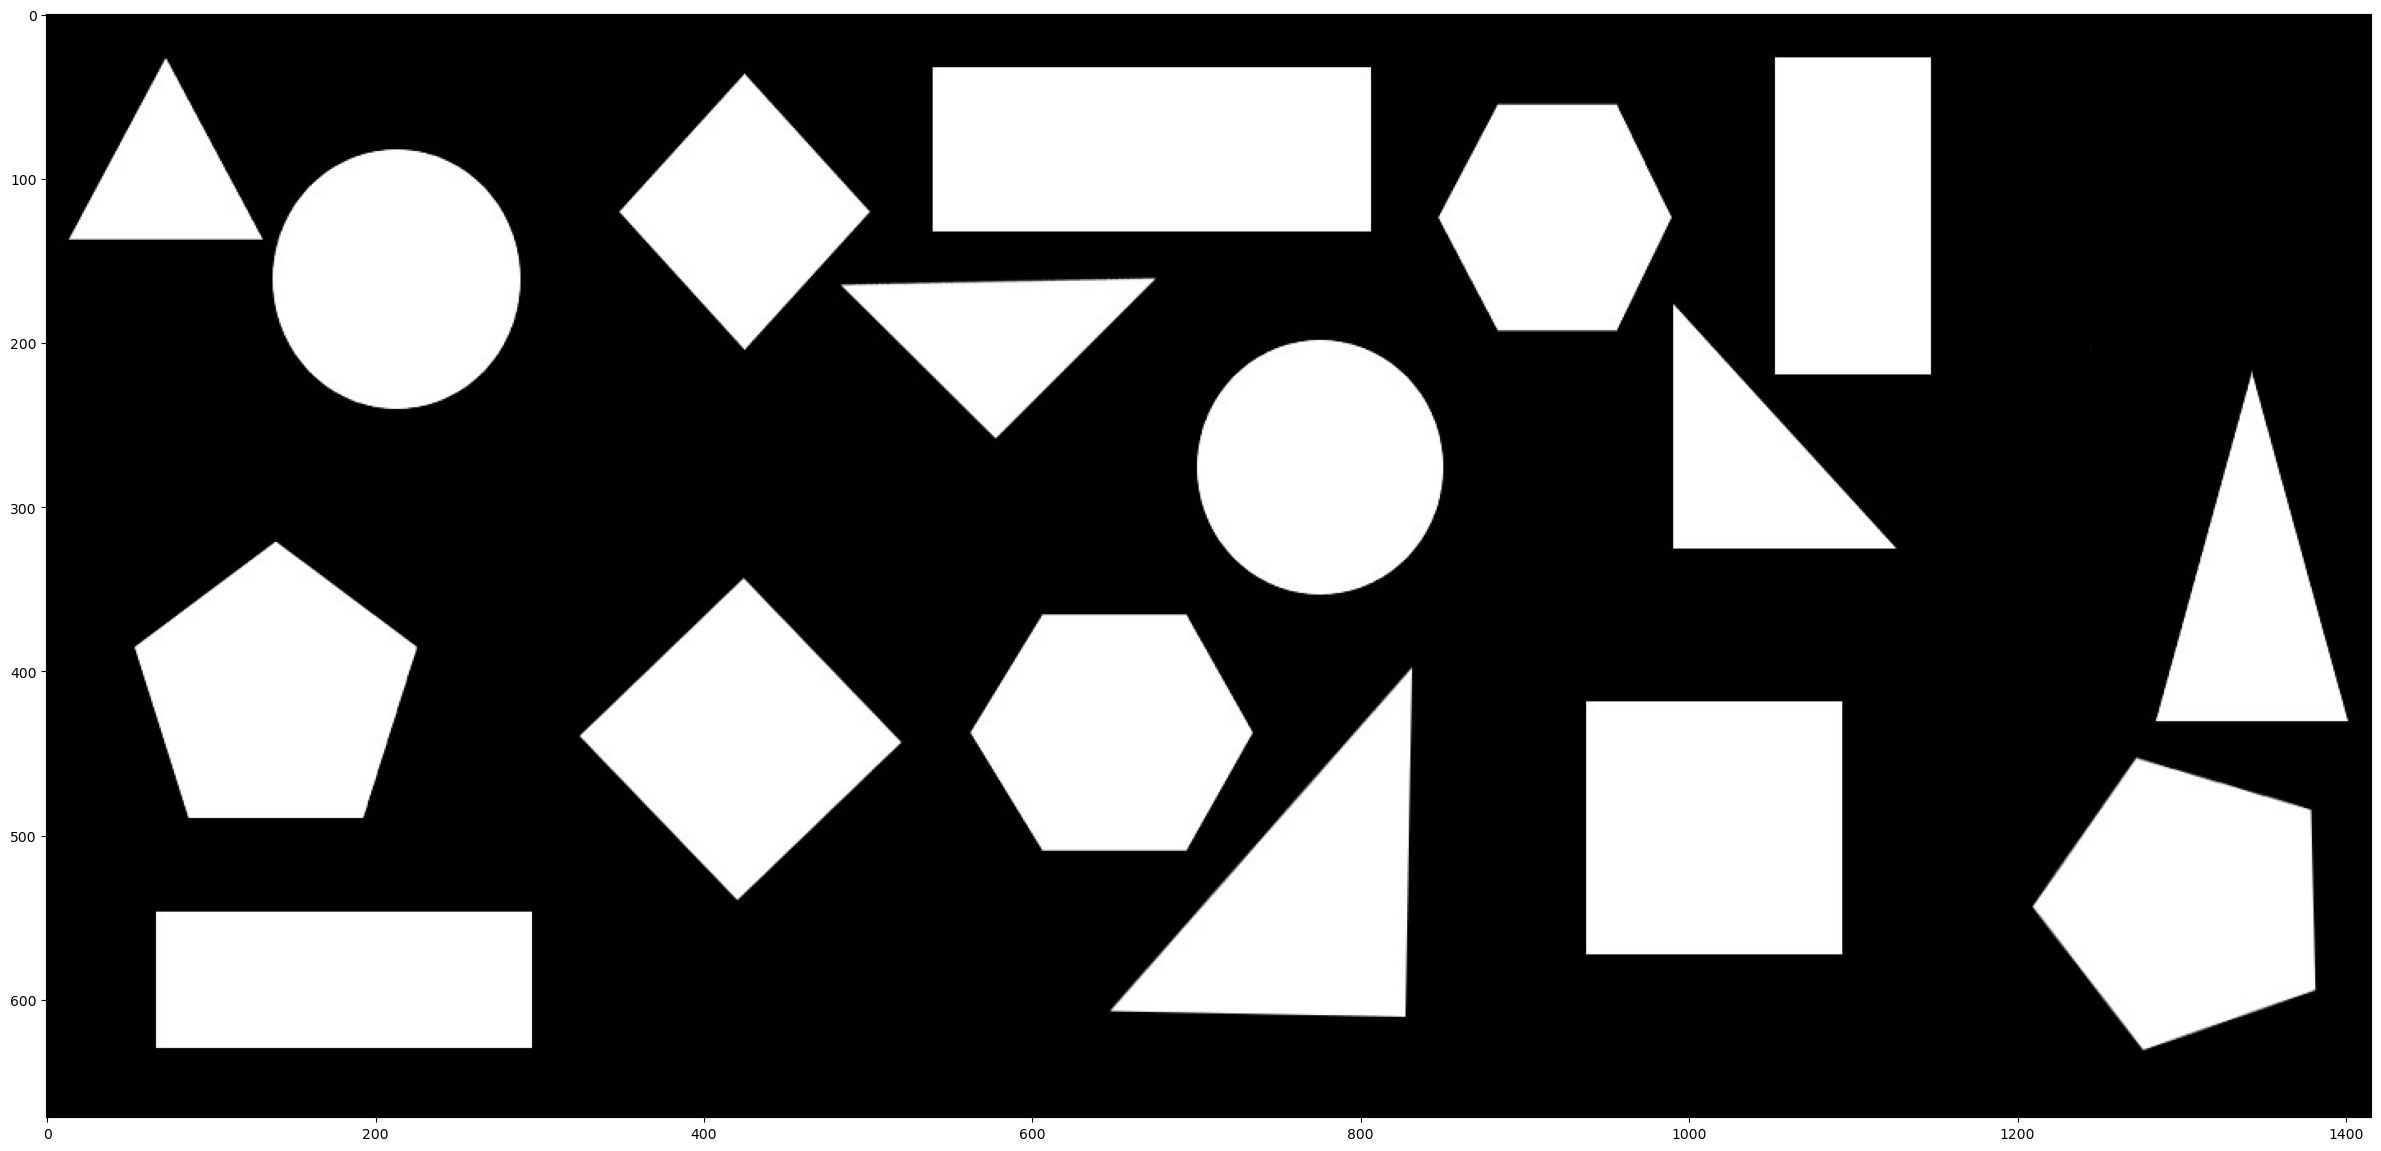

In [34]:
plot(image)

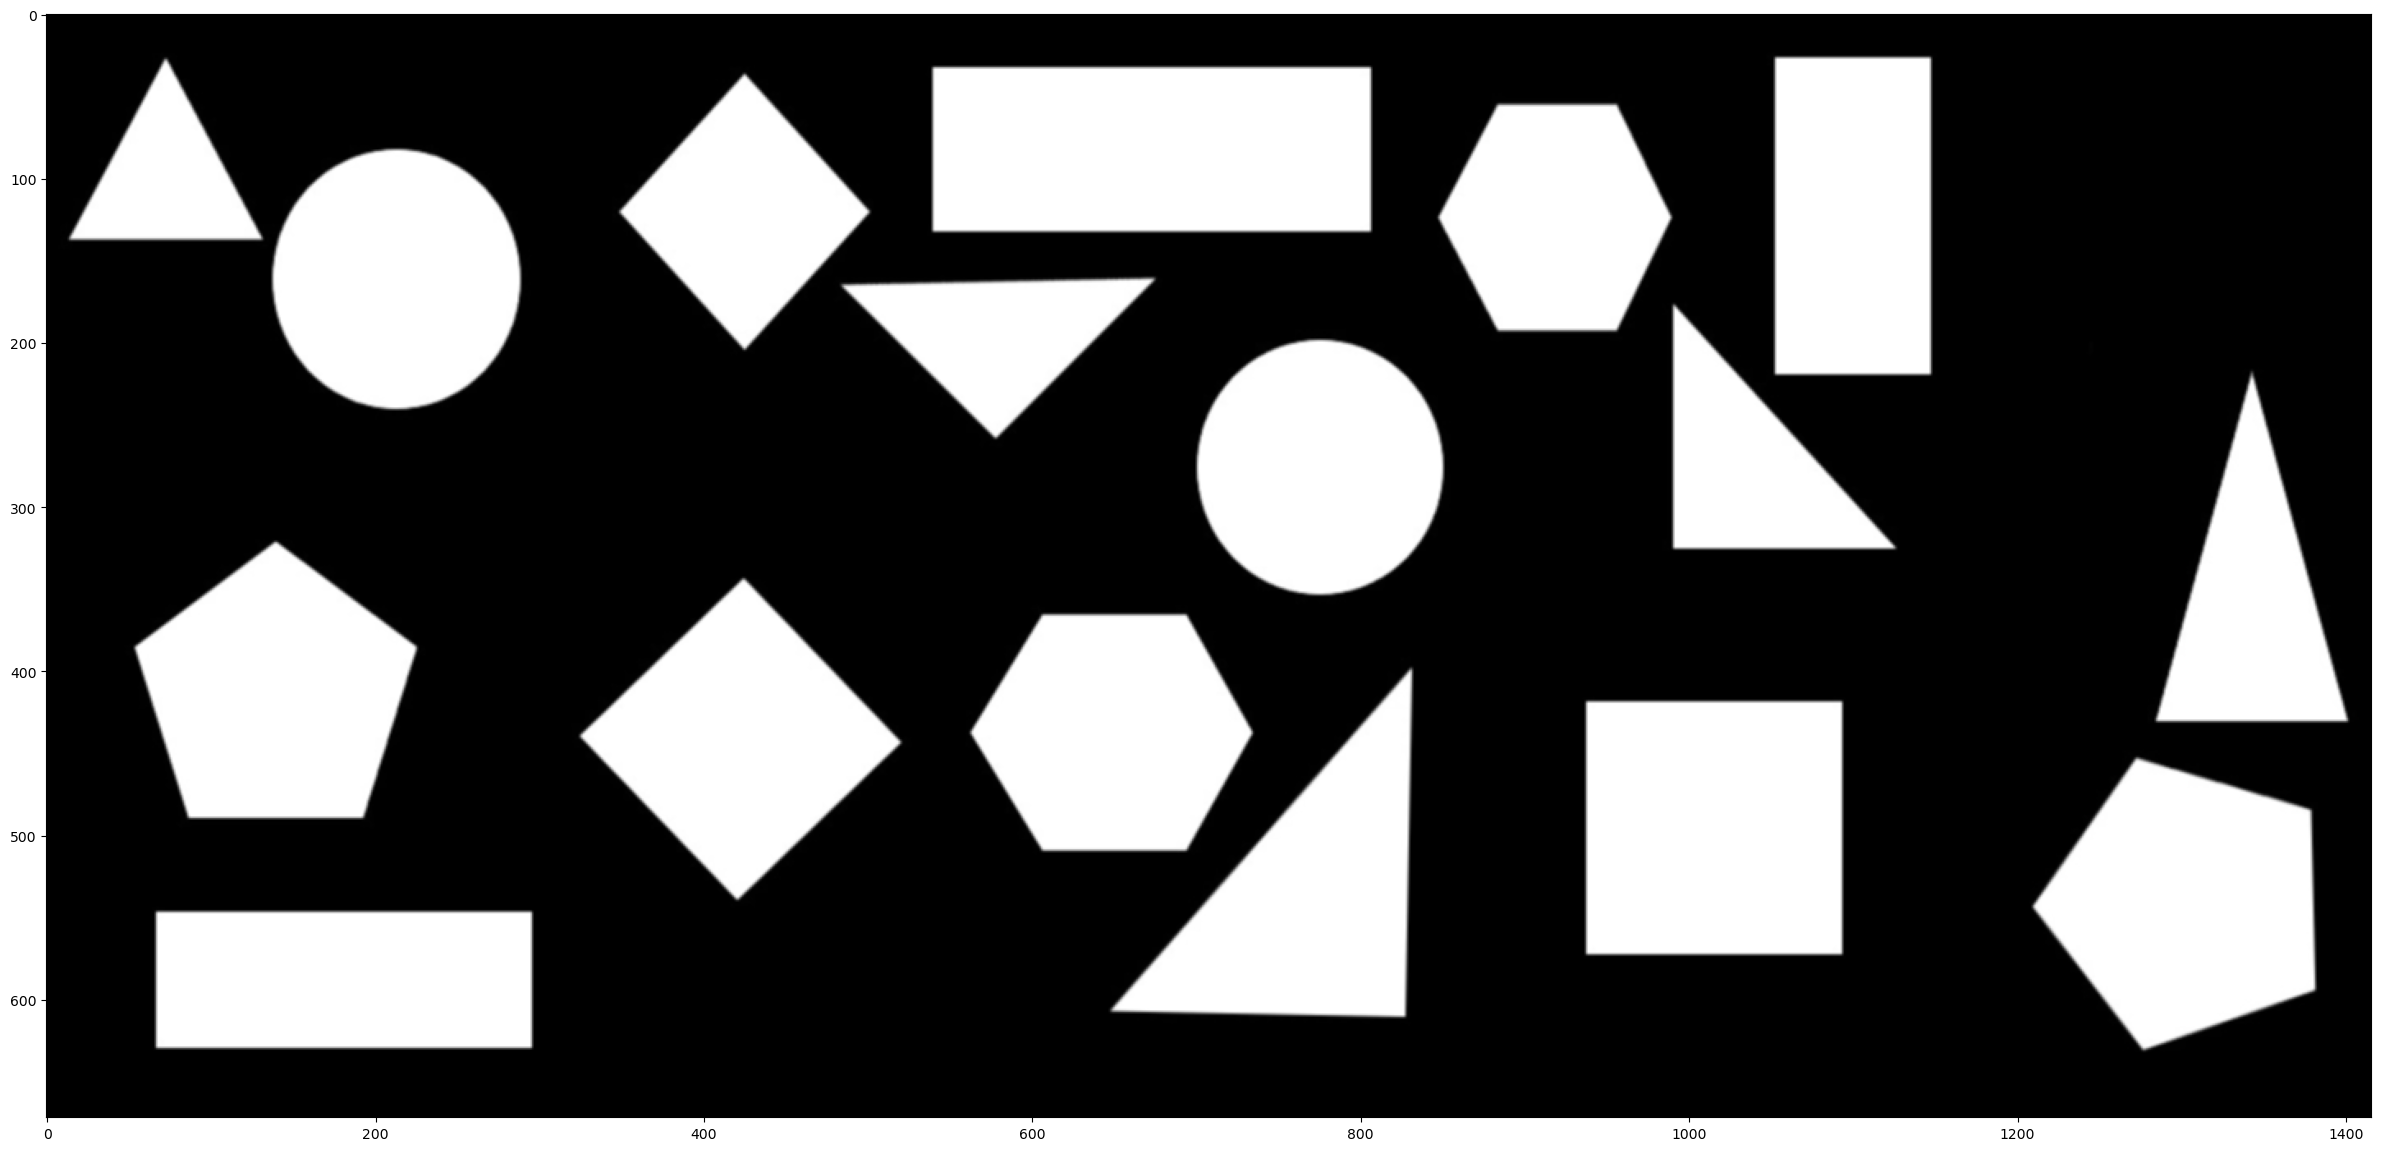

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3, 3), 0)
plot(blur)

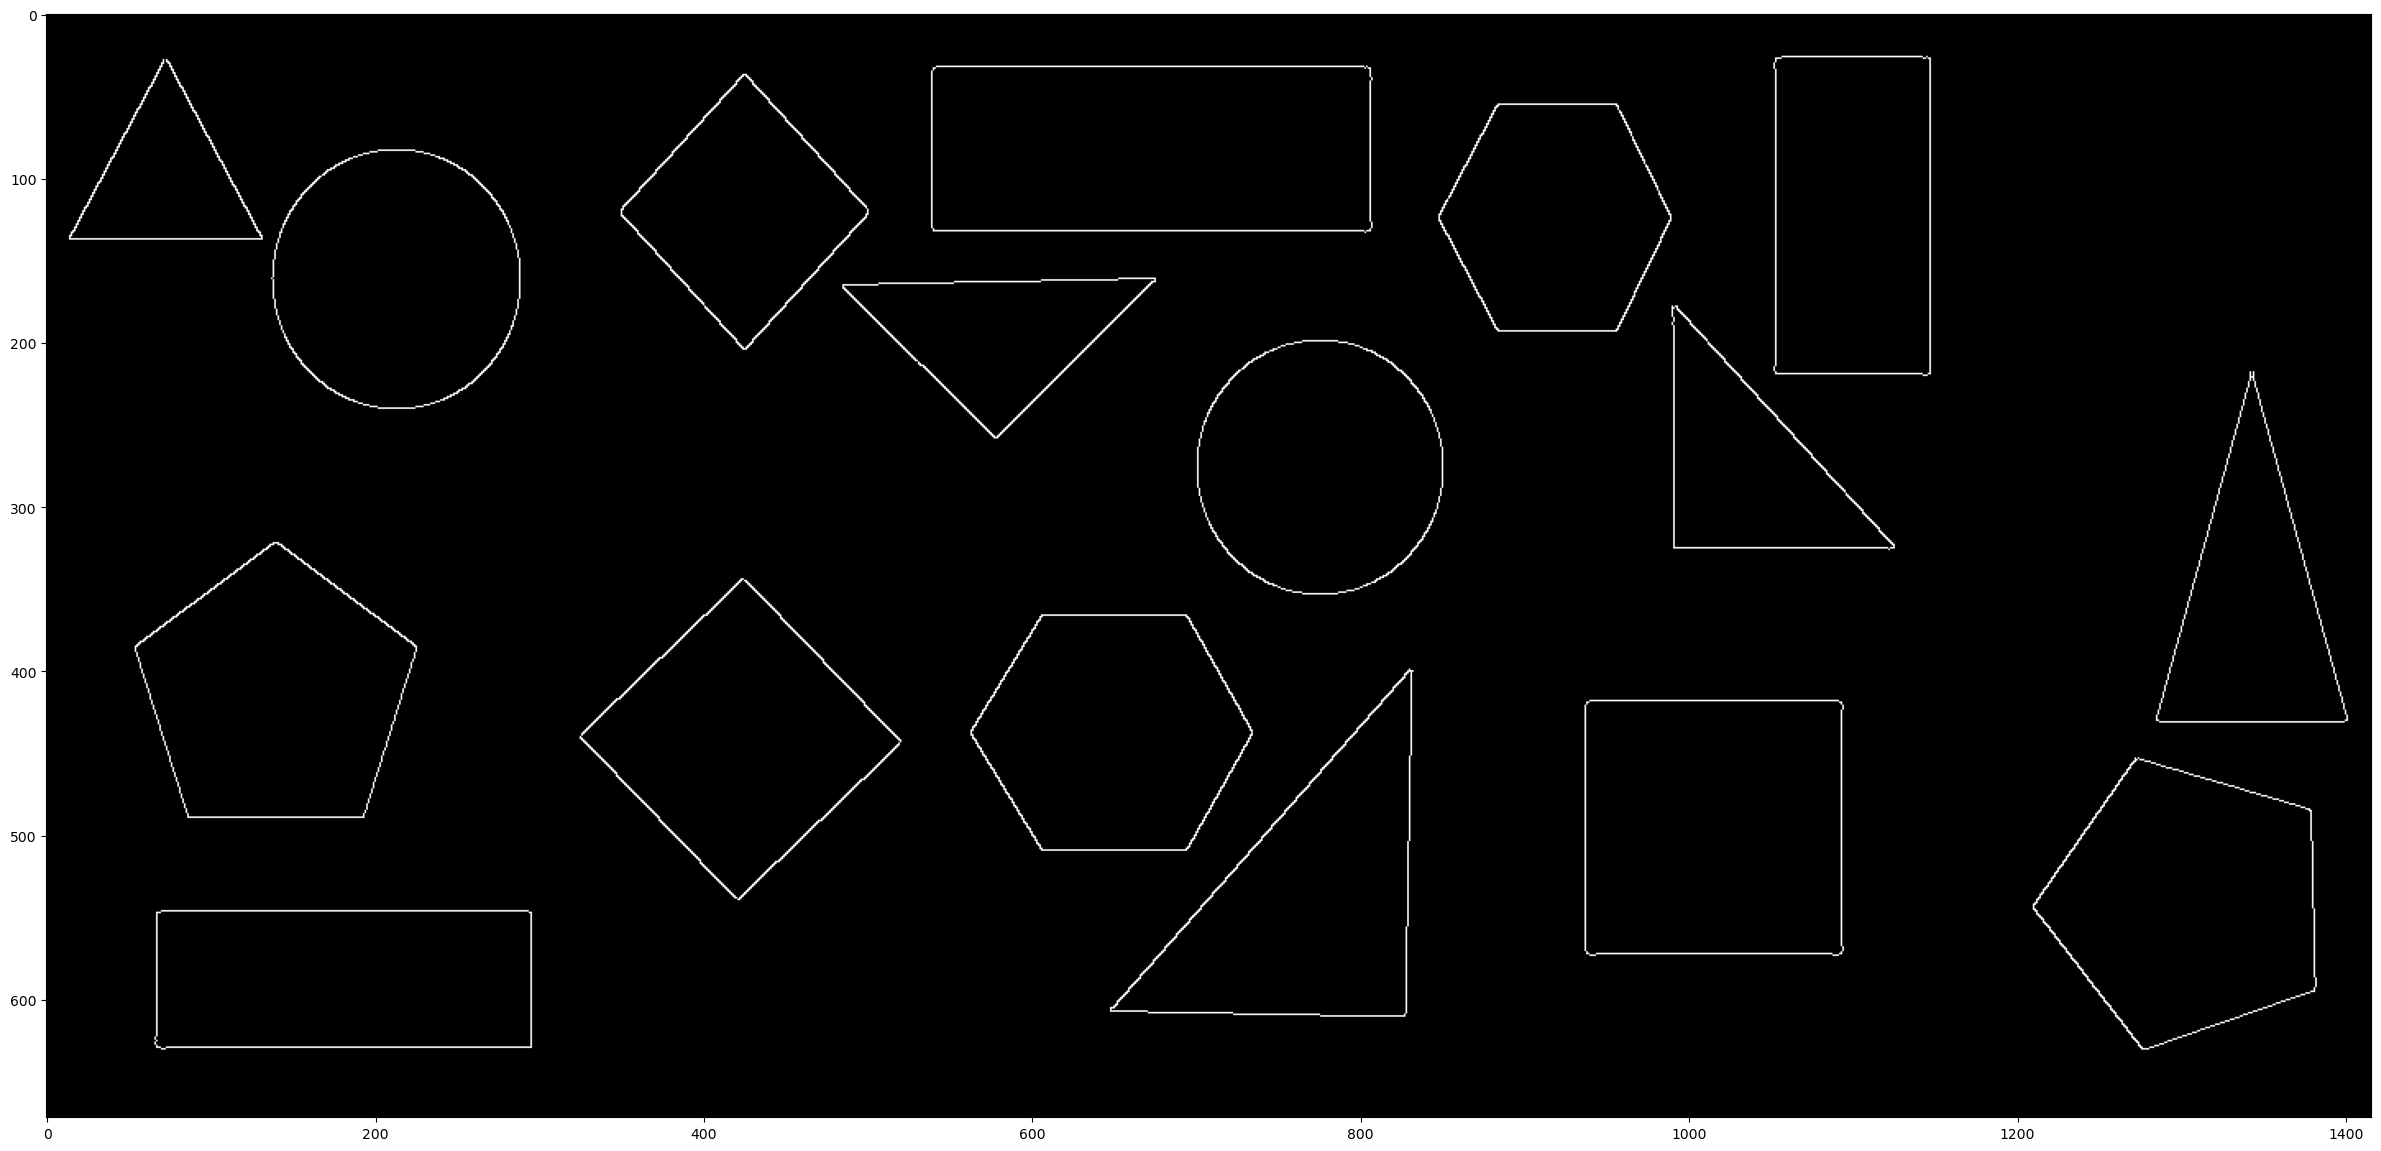

In [36]:
edges = cv2.Canny(blur, 30, 150)
plot(edges)

# shape detection

In [37]:
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [38]:
for contour in contours:
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    vertices = len(approx)

    if vertices == 3:
        x1, y1 = approx[0][0]
        x2, y2 = approx[1][0]
        x3, y3 = approx[2][0]
        
        angle1 = np.arctan2(y2 - y1, x2 - x1)
        angle2 = np.arctan2(y3 - y2, x3 - x2)
        angle3 = np.arctan2(y1 - y3, x1 - x3)

        angle1_deg = np.degrees(angle1)
        angle2_deg = np.degrees(angle2)
        angle3_deg = np.degrees(angle3)

        if any(87 < angle < 93 for angle in [angle1_deg, angle2_deg, angle3_deg]):
            shape = "Left Angle Triangle"
        elif any(-93 < angle < -87   for angle in [angle1_deg, angle2_deg, angle3_deg]):
            shape = "Right Angle Triangle"
        else:
            shape = "Triangle"
            
    elif vertices == 4:
        y1 = approx[0][0][1]
        y4 = approx[3][0][1]
        if y1 < y4:
            shape = "Rhombus"
        else:
            (x, y, w, h) = cv2.boundingRect(approx)
            ar = w / float(h)
            if 0.95 <= ar <= 1.05:
                shape = "Square"
            else:
                if w>h:
                    shape = "Horizontal Rectangle"
                else:
                    shape = "Vertical Rectangle"
                    
    elif vertices == 5:
        shape = "Pentagon"
    elif vertices == 6:
        shape = "Hexagon"
    else:
        shape = "Circle"

    M = cv2.moments(contour)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    # cv2.drawContours(image, [approx], 0, (0, 255, 0), 3)
    text_size = cv2.getTextSize(shape, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]

    text_x = int(cx - text_size[0] // 2)
    text_y = int(cy + text_size[1] // 2)

    cv2.putText(image, shape, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    for i, vertex in enumerate(approx):
        x, y = vertex[0]
        cv2.putText(image, str(i + 1), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


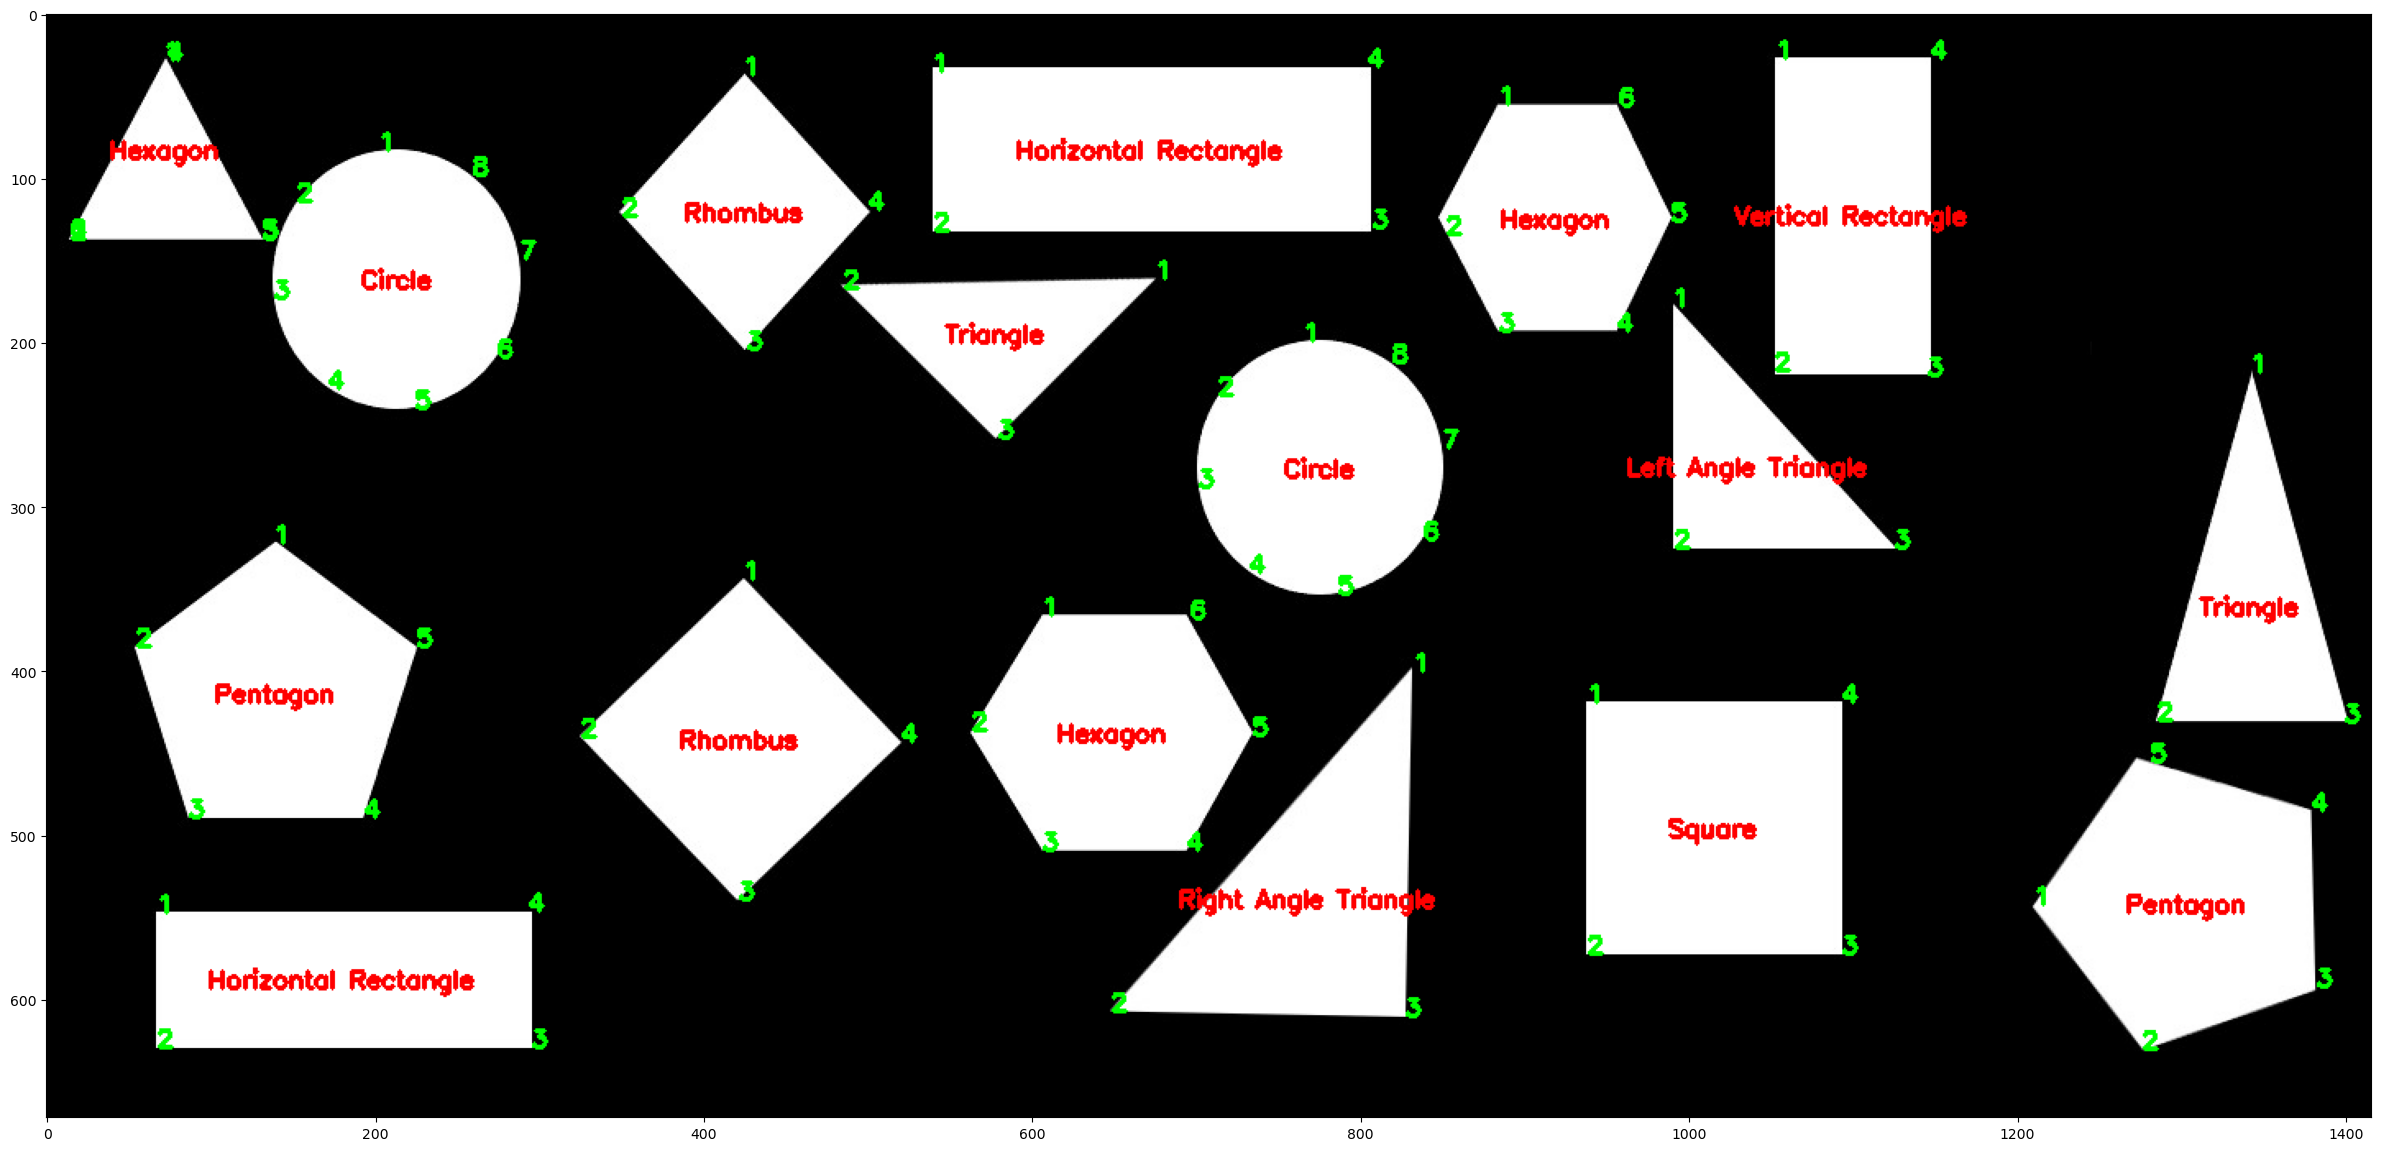

In [39]:
plot(image)

# export image

In [40]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imwrite('DetectedShapes.jpg',image)


True